In [1]:
import re
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We find the similar keywords using the speeches from 2020 only, so first we load the speeches.

In [2]:
speeches = pd.read_feather('speeches_2020.feather')

Then we filter the speeches with length less than 1000.

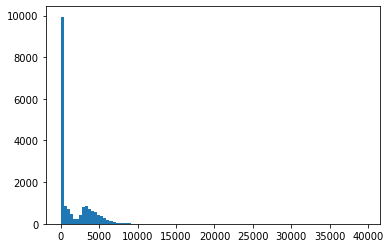

In [4]:
speeches_len = speeches.speechContent.apply(lambda s: len(s))
plt.hist(speeches_len, bins=100)
plt.show()

In [7]:
new_speeches = speeches[speeches.speechContent.str.len() > 1000]
new_speeches.shape

(6826, 12)

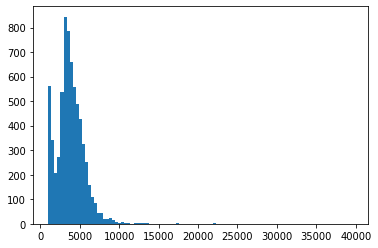

In [8]:
speeches_len = new_speeches.speechContent.apply(lambda s: len(s))
plt.hist(speeches_len, bins=100)
plt.show()

Now, we load the spacy model of German language.

In [10]:
nlp = spacy.load('de_core_news_lg')

/home/osho/miniconda3/envs/nlp/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [11]:
def clean_up_text(text):
    text = text.replace('-\n\n', '').replace('\n\n', ' ').replace('-\n', '')
    text = text.replace('\n', ' ').replace('\xa0', '').replace('–', '').replace('\u202f', '')
    text = re.sub(r'\({\d}\)', ' ', text)
    return text.lower()

Then, we run the nlp model through each of the cleaned speech content.

In [12]:
for speech in new_speeches.speechContent:
    _ = nlp(clean_up_text(speech))

Here is the function to extract similar words, it is based on similarity index provided by spacy itself.

In [13]:
def most_similar(word, topn=5):
    word = word.lower()
    word = nlp.vocab[str(word)]
    queries = [
        w for w in word.vocab 
        if w.is_lower == word.is_lower and np.count_nonzero(w.vector)
    ]

    by_similarity = sorted(queries, key=lambda w: word.similarity(w), reverse=True)
    return [(w.lower_,w.similarity(word)) for w in by_similarity[:topn+1] if w.lower_ != word.lower_]

These are the keywords we chose to work with in the beginning, but after this step we expand our keywords adding more similar keywords to the list.

In [14]:
keywords = ['Senioren', 'Pflege', 'Technologie', 'Datenschutz', 'Gesundheit', 'Infektion', 'Medikamente',
 'Digitalisierung', 'Transparenz', 'Software', 'App', 'Handy', 'Information', 'Krank', 'Corona',
 'Innovation', 'Erwachsene', 'Privatsphäre', 'Internet', 'Rentner', 'Rentnerin', 'Patient',
 'Krankheit', 'Krankenschwester', 'Arzt', 'Krankenhaus', 'Klinik', 'Pflegeheim', 'Rente']

Finally, we print out the 15 most similar keywords for each of the above mentioned keywords.

In [15]:
for keyword in keywords:
    print(keyword)
    print(most_similar(keyword, topn=15))
    print()

Senioren
[('familienmitglieder', 0.6848759), ('altersgruppen', 0.68037844), ('familien', 0.6759472), ('gruppen', 0.67279756), ('kindergarten', 0.6686923), ('reutlingen', 0.6598957), ('kinder', 0.65148264), ('kinderbetreuung', 0.6511692), ('kindertagesstätte', 0.65002984), ('euskirchen', 0.64355403), ('freundschaften', 0.6427213), ('mitglieder', 0.6404875), ('mitgliedern', 0.6332813), ('partnerschaften', 0.6332433), ('ehepaare', 0.6316042)]

Pflege
[('pflege-', 0.8113558), ('altenpflege', 0.7780991), ('körperpflege', 0.75695336), ('krankenpflege', 0.7528718), ('pfleger', 0.74941653), ('pflegen', 0.7482368), ('tagespflege', 0.70086604), ('pflegeheim', 0.6887157), ('pflegende', 0.67496455), ('pflegender', 0.67233944), ('betreuung', 0.6357204), ('pflegenden', 0.6356529), ('pflegerische', 0.6319217), ('kinderbetreuung', 0.62599677), ('fürsorge', 0.6218084)]

Technologie
[('technologien', 0.93937874), ('technologie-', 0.8827327), ('informationstechnologie', 0.85373545), ('innovation', 0.8485

[('rentnerin', 0.65548116), ('rente', 0.64077884), ('arbeitnehmer', 0.63928705), ('arbeitslosengeld', 0.63439685), ('kindergeld', 0.62358296), ('steuerzahler', 0.60841084), ('bürger', 0.6062312), ('arbeiter', 0.59635204), ('krankengeld', 0.584128), ('inhaber', 0.58168), ('arbeitgeber', 0.58092743), ('elterngeld', 0.5798917), ('arbeitslose', 0.5786541), ('ruhestand', 0.5771461), ('arbeitslos', 0.57543546)]

Rentnerin
[('haushälterin', 0.7482388), ('schwägerin', 0.7132636), ('erzieherin', 0.6999932), ('studentin', 0.6835982), ('lehrerin', 0.68326116), ('sängerin', 0.66574425), ('valentin', 0.660249), ('akademikerin', 0.6576978), ('kollegin', 0.65702856), ('putzfrau', 0.6567448), ('rentner', 0.65548116), ('schülerin', 0.6479403), ('chefin', 0.6455035), ('partnerin', 0.6414978), ('schwerin', 0.6354592)]

Patient
[('patienten', 0.8199916), ('patientin', 0.7869642), ('-patienten', 0.7443933), ('medikamente', 0.73112184), ('medikament', 0.7248075), ('medikaments', 0.72387576), ('diagnose', 0.